In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import researchpy as rp
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.python.data import Dataset
import keras
from keras.utils import to_categorical
from keras import models
from keras import layers


Using TensorFlow backend.


In [25]:
df_raw  = pd.read_csv(r'C:\\Users\\Romin\\Projects\\Data sc\\ML\\Heart.csv')

df_raw.head()
# df_raw.shape

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# to see if there is any missing value
df_raw.isnull().sum() # there is is no missing value

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

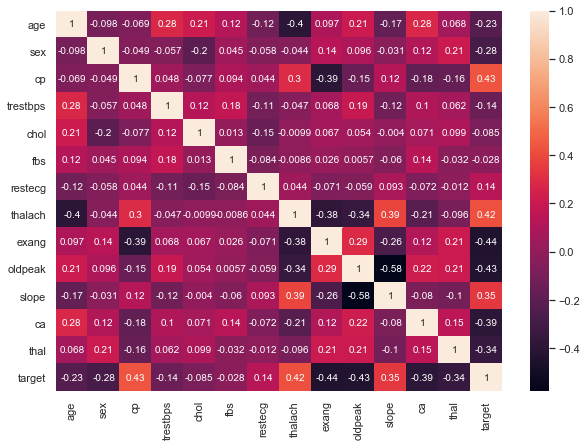

In [7]:
plt.subplots(figsize=(10,7))

sns.heatmap(df_raw.corr(), annot = True)

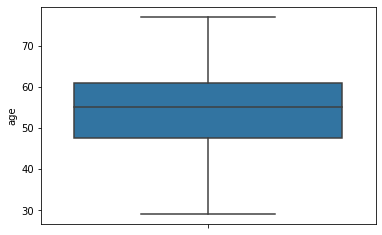

In [18]:
sns.boxplot(y =  df_raw['age'])

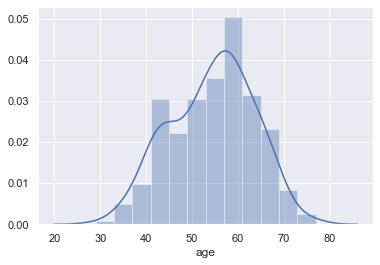

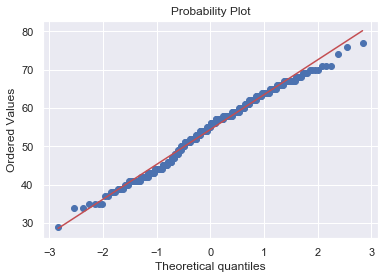

In [318]:
sns.distplot(df_raw['age'], label ='age')
fig = plt.figure()
res = stats.probplot(df_raw['age'], plot=plt)


#### Bivariate Analysis


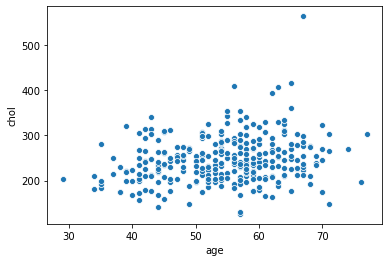

In [27]:
sns.scatterplot(df_raw['age'], df_raw['chol'])

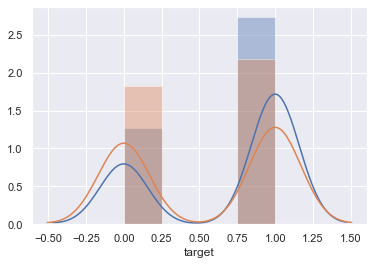

In [320]:
sns.distplot(df_raw['sex'], label ='sex') #b
sns.distplot(df_raw['target'], label ='target')

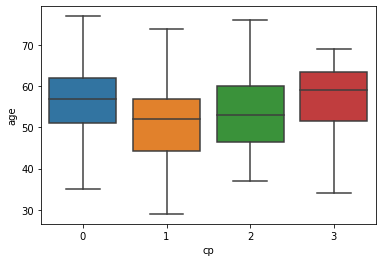

In [39]:
sns.boxplot( df_raw['cp'], df_raw['age'])

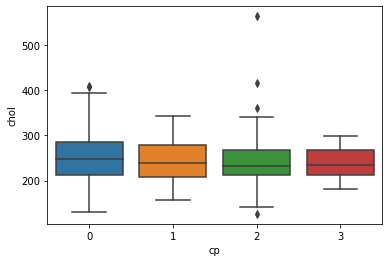

In [43]:
sns.boxplot( df_raw['cp'], df_raw['chol'])

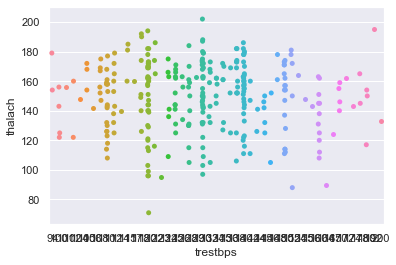

In [111]:
# sns.scatterplot(df_raw['trestbps'], df_raw['thalach'])

#categorical scattreplot
ax = sns.stripplot(df_raw['trestbps'], df_raw['thalach']) 
# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# ax.set_xticks(np.arange(0,210,2))


In [106]:
df_raw['trestbps'].max()

200

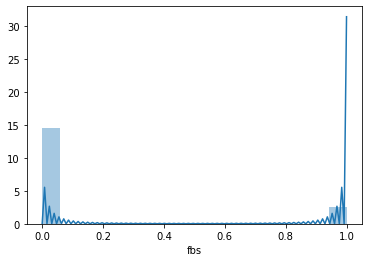

In [48]:
# sns.distplot(df_raw['target'], label ='target') #b
sns.distplot(df_raw['fbs'], label ='fbs')


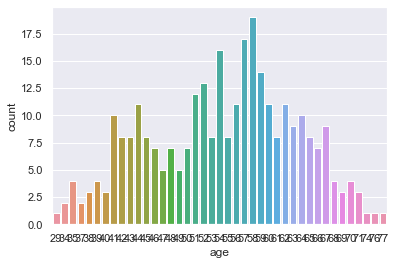

In [92]:


# g.set(xlim = (20,80), xticks = (np.arange(90))
sns.countplot(df_raw['age'])
# xlabel =(pd.cut(df_raw['age'], bins = 10))


In [82]:
# bins = (20,30,40,50,60,70,80)
# group_names = [20,30,40,50,60,70]
# pd.cut(df_raw['age'], bins = bins, labels = group_names)

0      60
1      30
2      40
3      50
4      50
       ..
298    50
299    40
300    60
301    50
302    50
Name: age, Length: 303, dtype: category
Categories (6, int64): [20 < 30 < 40 < 50 < 60 < 70]

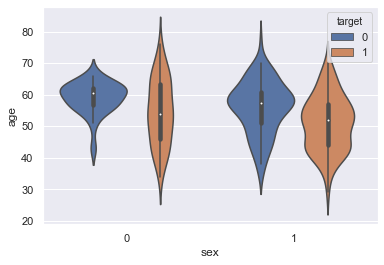

In [95]:
sns.violinplot(x="sex", y="age", hue="target", data=df_raw)

In [117]:
rp.summary_cont(df_raw['target'].groupby(df_raw['sex']))

,N,Mean,SD,SE,95% Conf.,Interval
sex,,,,,,
0,96,0.750000,0.435286,0.044426,0.662468,0.837532
1,207,0.449275,0.498626,0.034657,0.381183,0.517368


In [118]:
df_raw.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [134]:
# sm.qqplot(df_raw['thalach'], line = '45')

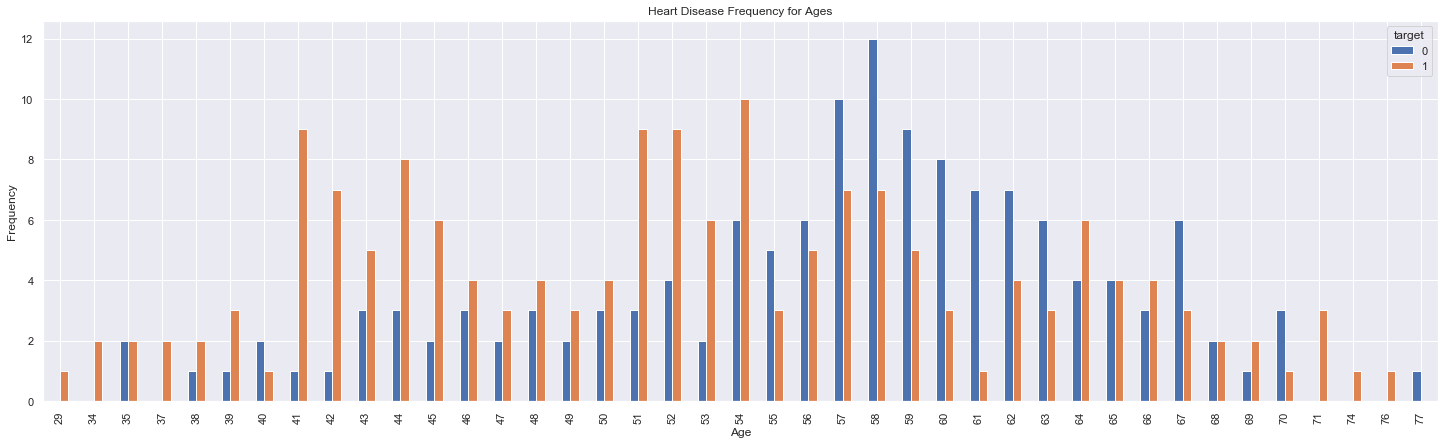

In [250]:
pd.crosstab(df_raw.age,df_raw.target).plot(kind="bar",figsize=(25,7))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
# plt.savefig('heartDiseaseAndAges.png')
plt.show()


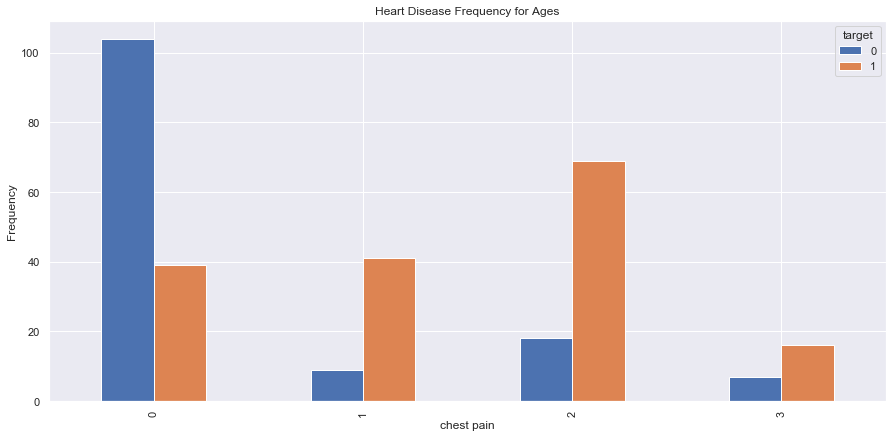

In [255]:
pd.crosstab(df_raw.cp,df_raw.target).plot(kind="bar",figsize=(15,7))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('chest pain')
plt.ylabel('Frequency')
# plt.savefig('heartDiseaseAndAges.png')
plt.show()


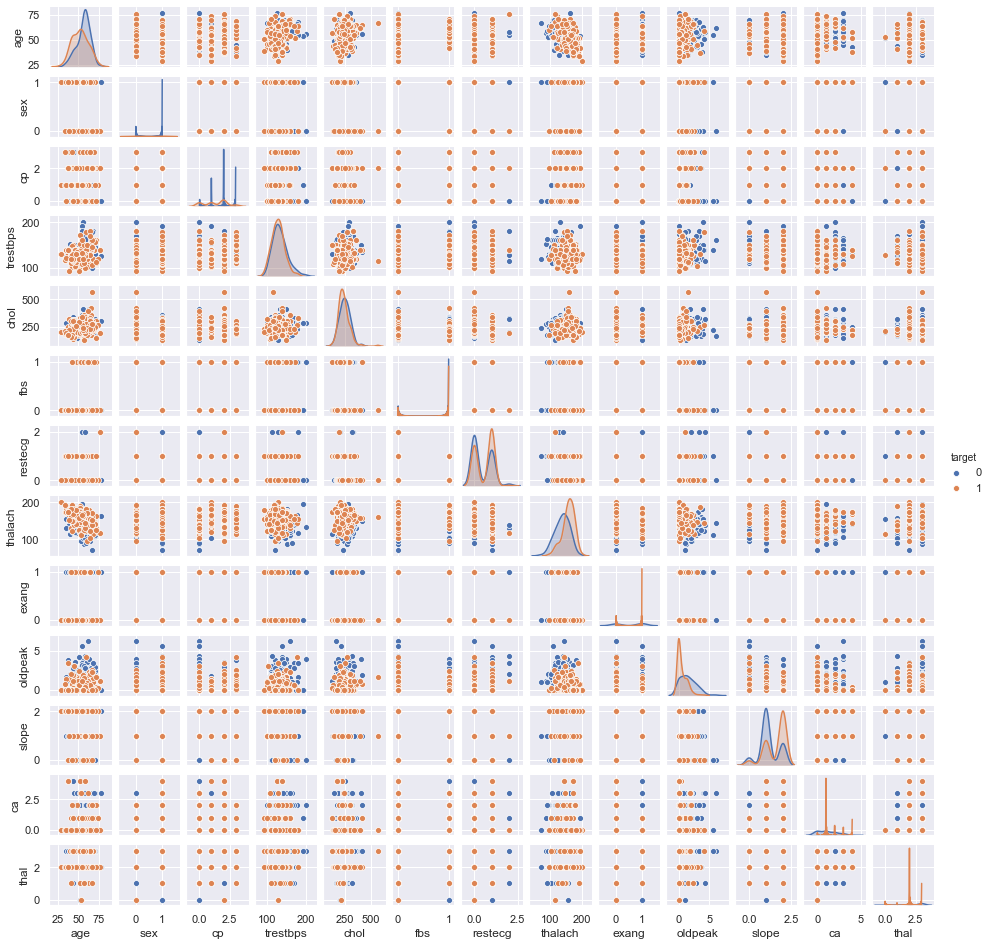

In [329]:
sns.pairplot(df_raw, hue="target", size=1)

In [145]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(df_raw)
print("===Chi2 Stat===")
print(chi2_stat)
# print("\n")
print("===Degrees of Freedom===")
print(dof)
# print("\n")
print("===P-Value===")
print(p_val)
# print("\n")
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
5597.884480512337
===Degrees of Freedom===
3926
===P-Value===
5.307596012924699e-63
===Contingency Table===
[[55.26103908  0.69441116  0.98291049 ...  0.74137617  2.35160495
   0.55351614]
 [56.56823008  0.71083735  1.00616108 ...  0.7589133   2.40723179
   0.56660948]
 [51.03568227  0.64131526  0.90775541 ...  0.68468924  2.17179708
   0.51119332]
 ...
 [51.40390509  0.64594235  0.91430487 ...  0.68962927  2.18746661
   0.51488158]
 [40.70703229  0.51152526  0.72404301 ...  0.54612118  1.73226672
   0.40773753]
 [55.41753378  0.69637768  0.98569401 ...  0.74347569  2.3582645
   0.55508366]]


In [142]:
df_raw.shape

(303, 14)

### Cheking dependcy 

In [9]:
v= df_raw['target']
w= df_raw['sex']

In [23]:
W = sm.add_constant(w)
reg_log = sm.Logit(v,W)
result_log= reg_log.fit()
result_log.summary()

Optimization terminated successfully.
         Current function value: 0.648180
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      301
Method:                           MLE   Df Model:                            1
Date:                Sun, 29 Mar 2020   Pseudo R-squ.:                 0.05948
Time:                        20:08:48   Log-Likelihood:                -196.40
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 6.226e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0986      0.236      4.661      0.000       0.637       1.561
sex           -1.3022      0.274     -4.752      0.000      -1.839      -0.765
==============================================================================
"""

In [24]:
np.exp(-1.3022)

0.27193288213288974

### Implementing ML algorithms

##### I. Random Forest

In [301]:
X = df_raw.drop('target', axis= 1) #data
y = df_raw.target #label
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.70 , random_state =  90)

In [259]:
print (df_raw.shape)
print (X.shape)
print (X_test.shape)
print (X_test_norm.shape)
print (X_train.shape)
print (X_train_norm.shape)
print (y.shape)
print (y_test.shape) 
# print (y_test_norm.shape)
print (y_train.shape)
# print (y_train_norm.shape)

(303, 14)
(303, 13)
(91, 13)
(91, 13)
(212, 13)
(212, 13)
(303,)
(91,)
(212,)


In [244]:
# X_test_norm

In [344]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model_forest = RandomForestClassifier(random_state=30, n_estimators= 10)

'''
#finding the optimal n_estimator
params_to_test = {'n_estimators':[2,5,7,10,15,20]} # 'max_depth':[3,5,6,10,12]}
grid_search = GridSearchCV(model_forest, param_grid=params_to_test, cv=10, scoring='f1_macro', n_jobs=4)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_ 

#best_params is a dict you can pass directly to train a model with optimal settings 
# best_model = RandomForestClassifier(**best_params)
# predict =best_model.predict(X_test)

print(best_params)
model_forest = RandomForestClassifier(**best_params)
'''

model_forest.fit(X_train, y_train)

predict =model_forest.predict(X_test)

from sklearn import metrics
print ('Accuracy:', metrics.accuracy_score(y_test,predict ))
print(model_forest.feature_importances_)


Accuracy: 0.8241758241758241
[0.09412513 0.01886574 0.08557771 0.05634788 0.07235247 0.01111458
 0.01473418 0.12181191 0.09346676 0.11292545 0.06185984 0.1202935
 0.13652484]


##### normalizing the data ####

In [302]:
# Normalizing the data since features have different ranges.

train_norm = X_train[X_train.columns[:]]
test_norm = X_test[X_test.columns[:]]

# Normalize Training Data
std_scale = preprocessing.StandardScaler().fit(train_norm)
X_train_norm = std_scale.transform(train_norm)


'''
training_norm_col = pd.DataFrame(X_train_norm, index=train_norm.index, columns=train_norm.columns) 
X_train.update(training_norm_col)
print (X_train.head())
'''
# print("\n")
# Normalize Testing Data by using mean and SD of training set
X_test_norm = std_scale.transform(test_norm)
# testing_norm_col = pd.DataFrame(X_test_norm, index=test_norm.index, columns=test_norm.columns) 
# X_test.update(testing_norm_col)
# print (X_test_norm)

In [334]:
##### Using Normalized data to compare the two accuarcy outputs! ####
model_forest = RandomForestClassifier(n_estimators =10, random_state=30)
model_forest.fit(X_train_norm, y_train)

predict =model_forest.predict(X_test_norm)

from sklearn import metrics
print ('Accuracy:', metrics.accuracy_score(y_test,predict))
print(model_forest.feature_importances_)

Accuracy: 0.8241758241758241
[0.09412513 0.01886574 0.08557771 0.05634788 0.07235247 0.01111458
 0.01473418 0.12181191 0.09346676 0.11292545 0.06185984 0.1202935
 0.13652484]


In [354]:
predict

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [338]:
#A confusion matrix is a table that is often used to describe the performance of a classification model

from sklearn.metrics import confusion_matrix

y_predict = model_forest.predict(X_test)
y_pred_quant = model_forest.predict_proba(X_test)[:, 1]
y_pred_bin = model_forest.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred_bin)
confusion_matrix

array([[40,  1],
       [49,  1]], dtype=int64)

In [339]:
total=sum(sum(confusion_matrix))

#true positive/(true Positive + false negative)
sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

#true neg/ (true neg + False positive)
specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.449438202247191
Specificity :  0.5


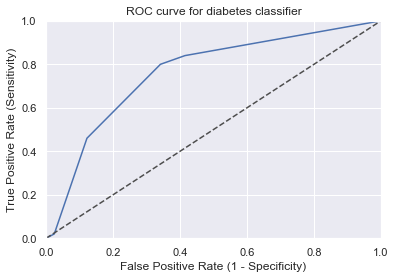

In [340]:
#### Receiver Operator Curve (ROC)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [342]:
####Area Under the Curve(AUC)
metrics.auc(fpr, tpr)

0.7604878048780488

In [352]:
from pdpbox import pdp, info_plots #for partial plots
base_features = df_raw.columns.values.tolist()
base_features.remove('target')

feat_name = 'num_major_vessels'
pdp_dist = pdp.pdp_isolate(model=model_forest, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

ValueError: feature does not exist: num_major_vessels

In [ ]:
##### II. 